# Importing Packages

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

# Data Preprocessing

In [3]:
df=pd.read_csv(r"C:\Users\Arigala.Adarsh\Downloads\Cancer_Data.csv")

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df.shape

(569, 33)

In [6]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

# Exploratory Data Analysis.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [7]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [12]:
df.drop("Unnamed: 32",axis=1,inplace=True)

In [13]:
df.drop("id",axis=1,inplace=True)

In [14]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

##### We will analyze the distribution of benign (B) and malignant (M) cancers in the data on the graph with two unique features

"M" = Malignant Cancer

"B" = Benign Cance

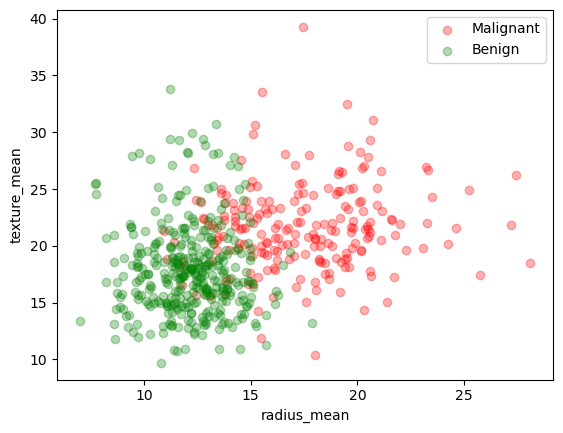

In [16]:
M = df[df.diagnosis == "M"] #Diagnosis transfers all values of M to M data
B = df[df.diagnosis == "B"] #Diagnosis transfers all values of B to B data

plt.scatter(M.radius_mean,M.texture_mean, color = "red", label = "Malignant", alpha = 0.3)
plt.scatter(B.radius_mean,B.texture_mean, color = "green", label = "Benign", alpha = 0.3)

plt.xlabel("radius_mean")
plt.ylabel("texture_mean")

plt.legend()
plt.show()

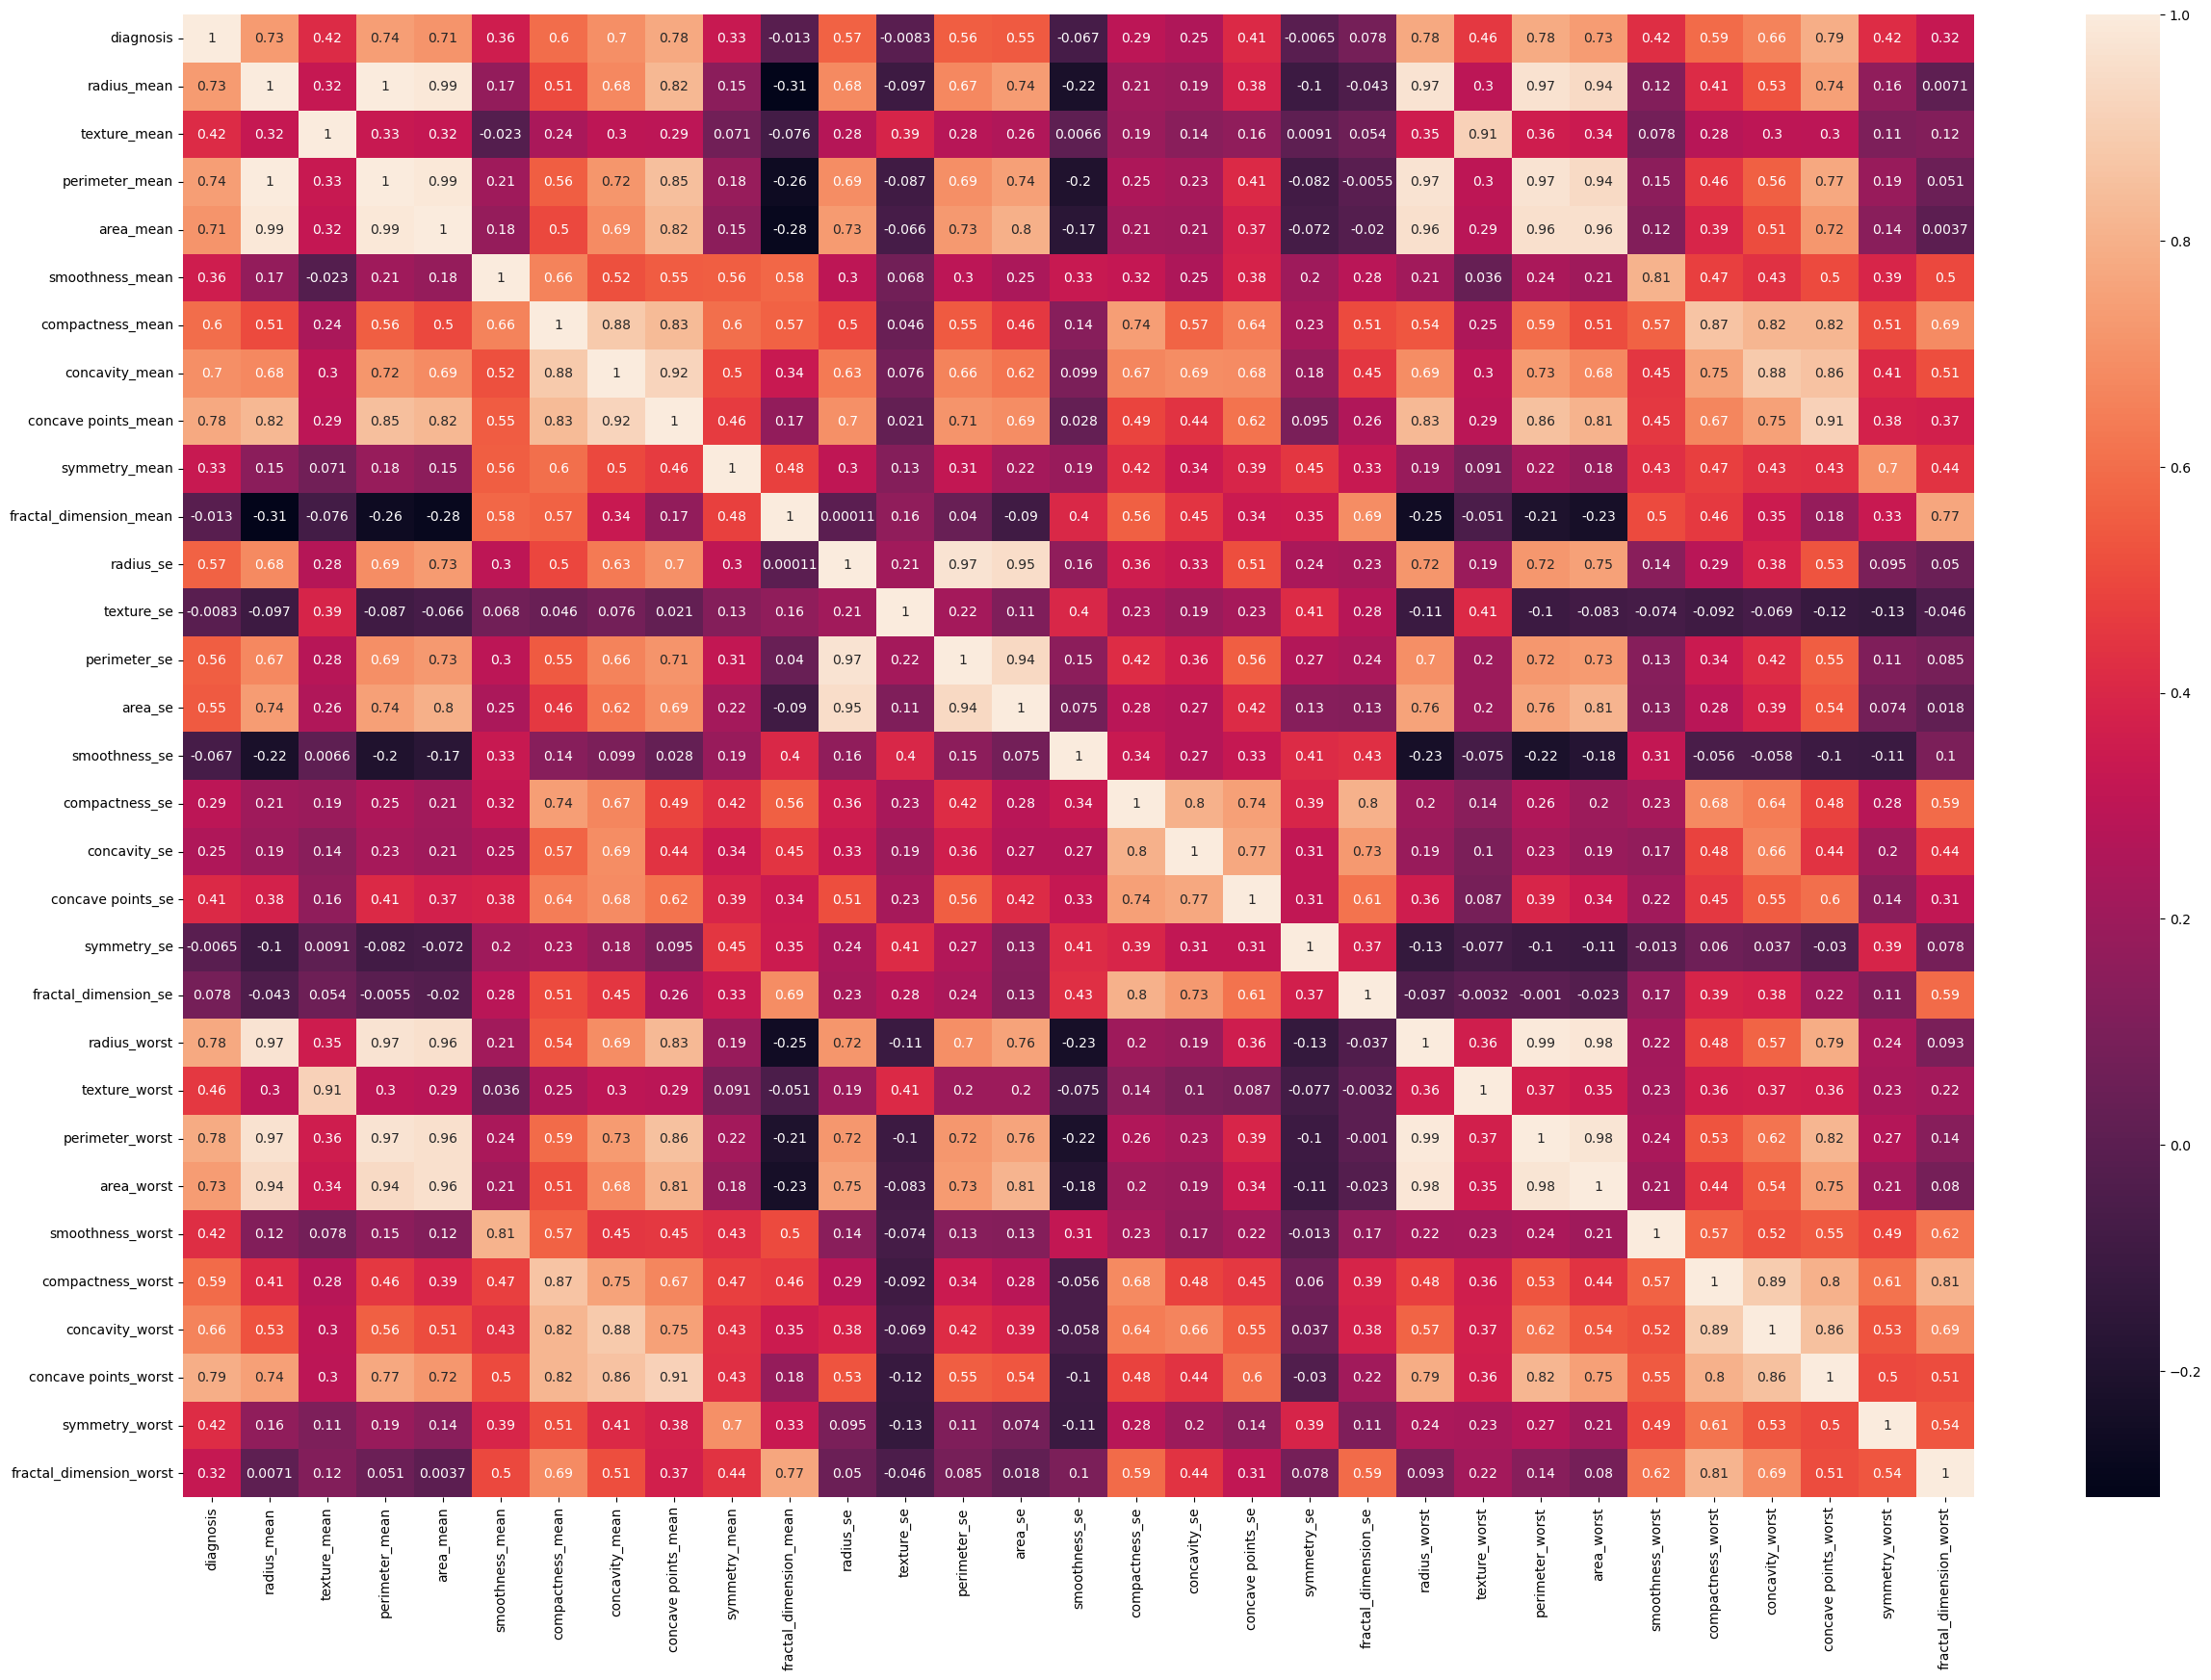

In [130]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [19]:
label=LabelEncoder()
df['diagnosis']=label.fit_transform(df['diagnosis'])

In [20]:
df.diagnosis

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int32

In [22]:
df.diagnosis.unique()

array([1, 0])

C:\Users\Arigala.Adarsh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


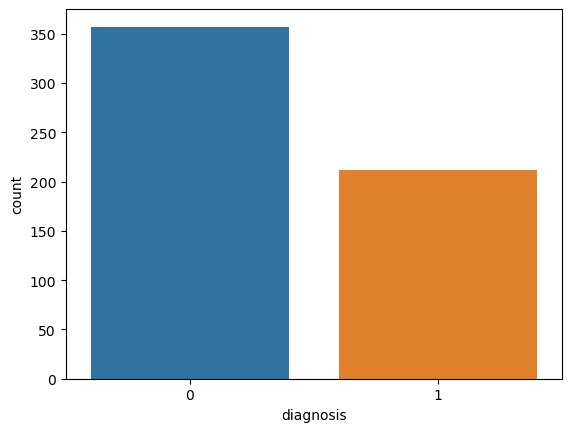

In [133]:
sns.countplot(df.diagnosis)
plt.show()

# Segregration of Data(Independent and Dependent variables)

In [23]:
x=df.drop('diagnosis',axis=1)
y=df.diagnosis

In [24]:
x

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [25]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int32

### Data Normalization

we reduce all data to values between 0 and 1 so that operations can be performed and so that very large or very small values in the data cannot manipulate the data


In [32]:
from sklearn.preprocessing import MinMaxScaler
MinMax=MinMaxScaler()
scaled_data=MinMax.fit_transform(x)
x_data= pd.DataFrame(scaled_data, columns=x.columns)

In [33]:
x_data

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,0.425442,...,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


# Spliting the Dataset into train and test dataset

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_data,y,test_size = 0.3,random_state=1)

In [41]:
x_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
249,0.214823,0.176530,0.207864,0.111474,0.439379,0.180050,0.101406,0.145577,0.415657,0.246841,...,0.167912,0.244403,0.151751,0.075354,0.447269,0.127010,0.144089,0.330172,0.216637,0.151187
58,0.287236,0.324653,0.268261,0.162757,0.252505,0.056776,0.001621,0.020711,0.383333,0.106361,...,0.224120,0.272655,0.198366,0.107870,0.204253,0.033588,0.001474,0.038179,0.172285,0.051489
476,0.341663,0.365911,0.335982,0.201442,0.331137,0.280412,0.118627,0.151988,0.225253,0.213353,...,0.303095,0.406183,0.307236,0.158106,0.291422,0.306206,0.200639,0.460137,0.191011,0.154401
529,0.240854,0.126141,0.235229,0.127975,0.517920,0.216889,0.088590,0.139066,0.301515,0.339511,...,0.196371,0.099947,0.181832,0.089633,0.534438,0.131861,0.129553,0.254055,0.239700,0.167126
422,0.219083,0.213392,0.218851,0.112280,0.507087,0.298816,0.166284,0.223509,0.417172,0.278854,...,0.167556,0.203891,0.156980,0.071397,0.464439,0.184058,0.183866,0.379725,0.240883,0.126131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,0.606228,0.521136,0.598507,0.444751,0.441184,0.427949,0.596298,0.571074,0.576768,0.235257,...,0.522946,0.574627,0.489516,0.345016,0.371987,0.348119,0.453115,0.595189,0.342992,0.194215
144,0.178380,0.177883,0.169097,0.089841,0.228401,0.098184,0.052741,0.039140,0.171212,0.145746,...,0.143010,0.231876,0.136361,0.062918,0.240573,0.092179,0.077915,0.117285,0.144885,0.082973
72,0.483648,0.500845,0.486559,0.333362,0.491740,0.501871,0.396439,0.394831,0.437879,0.314027,...,0.547492,0.581023,0.503959,0.367627,0.576702,0.690893,0.524441,0.652577,0.344569,0.517250
235,0.333617,0.390260,0.317877,0.195080,0.343685,0.153580,0.034255,0.094235,0.230808,0.176706,...,0.263252,0.486674,0.238358,0.130333,0.379912,0.120315,0.049768,0.273643,0.130298,0.138594


In [42]:
y_train

249    0
58     0
476    0
529    0
422    0
      ..
129    1
144    0
72     1
235    0
37     0
Name: diagnosis, Length: 398, dtype: int32

In [43]:
print("x_train size:",x_train.shape)
print("x_test size:",x_test.shape)
print("y_train size:",y_train.shape)
print("y_test size:",y_test.shape)

x_tarin size: (398, 30)
x_test size: (171, 30)
y_tarin size: (398,)
y_test size: (171,)


# Choose the Model

C:\Users\Arigala.Adarsh\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  if X_feature_names is None and fitted_feature_names is not None:
C:\Users\Arigala.Adarsh\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  if X_feature_names is None and fitted_feature_names is not None:
C:\Users\Arigala.Adarsh\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  if X_feature_names is None and fitted_feature_names is not None:
C:\Users\Arigala.Adarsh\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  if X_feature_names is None and fitted_feature_names is not None:
C:\Users\Arigala.Ada

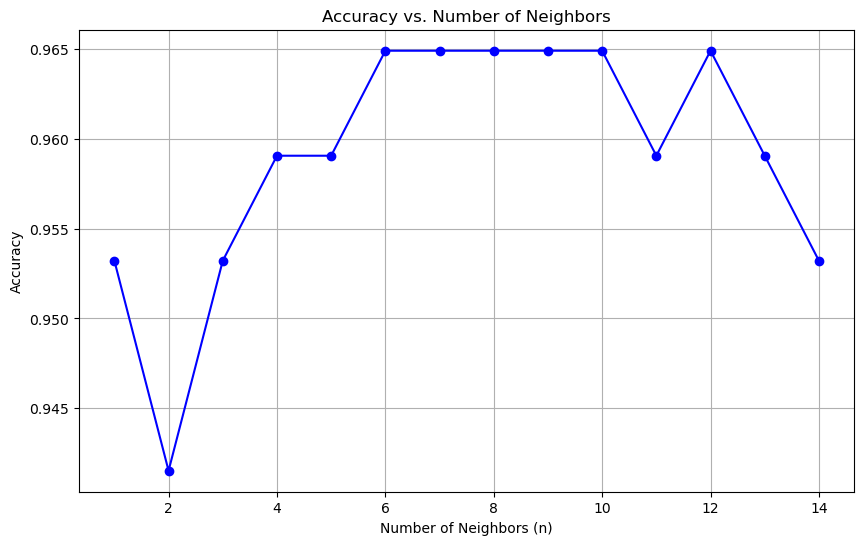

In [111]:
 
# Create lists to store values
n_values = []
accuracy_scores = []

# Iterate over different values of n_neighbors
for n in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(x_train, y_train)
    accuracy = knn.score(x_test.values, y_test)
    
    n_values.append(n)
    accuracy_scores.append(accuracy)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(n_values, accuracy_scores, marker='o', linestyle='-', color='b')
plt.title('Accuracy vs. Number of Neighbors')
plt.xlabel('Number of Neighbors (n)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


In [112]:
Score_list

[0.9532163742690059,
 0.9415204678362573,
 0.9532163742690059,
 0.9590643274853801,
 0.9590643274853801,
 0.9649122807017544,
 0.9649122807017544,
 0.9649122807017544,
 0.9649122807017544,
 0.9649122807017544,
 0.9590643274853801,
 0.9649122807017544,
 0.9590643274853801,
 0.9532163742690059]

In [119]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test.values)
print("{} nn {} score".format(3,knn.score(x_test.values,y_test)))

3 nn 0.9532163742690059 score


C:\Users\Arigala.Adarsh\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  if X_feature_names is None and fitted_feature_names is not None:
C:\Users\Arigala.Adarsh\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  if X_feature_names is None and fitted_feature_names is not None:


# Evolution of Model

In [122]:
print(metrics.classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       108
           1       0.97      0.90      0.93        63

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



In [134]:
print(metrics.recall_score(y_test,prediction))

0.9047619047619048


In [135]:
print(metrics.f1_score(y_test,prediction))

0.9344262295081968


C:\Users\Arigala.Adarsh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Arigala.Adarsh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


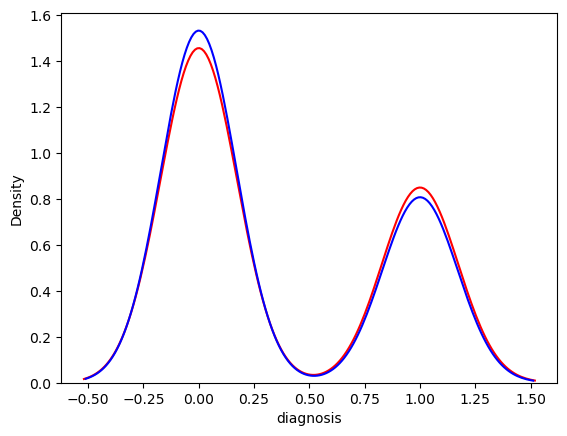

In [125]:
sns.distplot(y_test,hist=False,color="r")
sns.distplot(prediction,hist=False,color="b")
plt.show()

# Hyper Parameter Tunning

In [115]:

# Define the hyperparameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Example values for n_neighbors
    'weights': ['uniform', 'distance'],  # Weighting options
    'metric': ['euclidean', 'manhattan']  # Distance metrics
}

# Create the KNN classifier
knn = KNeighborsClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(x_train, y_train)




C:\Users\Arigala.Adarsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Arigala.Adarsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    # If `_MultimetricScorer` raises exception, the `error_score`
  File "C:\Users\Arigala.Adarsh\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Arigala.Adarsh\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Arigala.Adarsh\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
  File "C:\Users\Arigala.Adarsh\anaconda3\lib\site-pac

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [116]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print(best_params)

{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}


In [138]:
from sklearn.neighbors import KNeighborsClassifier
hyper_knn = KNeighborsClassifier(n_neighbors=3,metric="manhattan",weights="distance")
hyper_knn.fit(x_train,y_train)
hyper_prediction = hyper_knn.predict(x_test.values)
print("{} nn {} score".format(3,hyper_knn.score(x_test.values,y_test)))

3 nn 0.9590643274853801 score


C:\Users\Arigala.Adarsh\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  if X_feature_names is None and fitted_feature_names is not None:
C:\Users\Arigala.Adarsh\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  if X_feature_names is None and fitted_feature_names is not None:


In [118]:
print(metrics.classification_report(y_test,hyper_prediction))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       108
           1       0.97      0.92      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



In [137]:
print(metrics.accuracy_score(y_test,hyper_prediction))

0.9590643274853801


After applying of the hyper parameter tuning we got same value of Evolution metrics. 